#Proyecto Final de Matemáticas Discretas

###hecho por: Santiago Licea

In [494]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

##Análisis preliminar de los datos:

La carpeta del 2022 del programa "Quien es Quien en los Precios" (https://datos.gob.mx/busca/dataset/quien-es-quien-en-los-precios) contiene diferentes archivos .csv, desde '022022.csv' hasta '442022.csv', importemos el primero:

In [495]:
datos02 = pd.read_csv('/content/drive/MyDrive/1er semestre CD/Mates Discretas/Proyecto/Datos/022022.csv', header=None) 

Viene sin nombre de columnas, los siguientes nombres los obtuve de: https://datos.gob.mx/blog/quien-es-quien-en-los-precios

In [496]:
nombreCols = ['producto', 'presentacion', 'marca', 'categoria', 'catalogo', 'precio', 'fechaRegistro', 'cadenaComercial', 'giro', 'nombreComercial', 'direccion', 'estado', 'municipio', 'latitud', 'longitud']

In [497]:
#Renombramos:
datos02.columns=nombreCols

In [498]:
datos02.head(2)

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,A.S.COR,"FRASCO GOTERO 24 ML. 1.000 G., SOLUCION GOTAS",S/M,MEDICAMENTOS,MEDICAMENTOS,325.0,2022-01-03,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779
1,ACEITE,BOTELLA 1 LT. MIXTO,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,42.8,2022-01-03,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779


In [499]:
#Numero de cadenas comerciales:
len(datos02.loc[:,'cadenaComercial'].unique())

135

In [500]:
#Mostremos las primeras 15:
datos02.loc[:,'cadenaComercial'].unique()[:15] 

array(['MEGA SORIANA', 'MERCADO J. JESUS TERAN', 'OXXO',
       'SEARS ROEBUCK DE MEXICO', 'TORTILLERIAS TRADICIONALES', 'COPPEL',
       'ELEKTRA', 'FARMACIA', 'JULIO CEPEDA JUGUETERIAS', 'LIVERPOOL',
       'WAL-MART', 'BODEGA AURRERA', 'FARMACIA GUADALAJARA',
       'FARMACIAS DEL AHORRO', 'FARMACIAS DE SIMILARES'], dtype=object)

Acotaremos nuestro análisis a establecimientos en la Ciudad de México y únicamente tiendas Walmart y Bodega Aurrera, aunque podemos modificar las variables que se muestran a continuación si así lo deseamos.

In [501]:
tienda = ['WAL-MART', 'BODEGA AURRERA']
estado = 'CIUDAD DE MÉXICO'

In [502]:
#Actualizamos:
datos02 = datos02.loc[(datos02.loc[:,'estado']==estado)&(datos02.loc[:,'cadenaComercial'].isin(tienda))] 

In [503]:
#Nos podemos deshacer de la columna 'giro', 'estado' y 'municipio' pues no nos servirán más adelante
datos02.drop(['giro', 'estado', 'municipio'], axis=1, inplace=True)

In [504]:
datos02.loc[:,'catalogo'].unique() #La etiqueta BASICOS de 'catalogo' contiene muchas 'categorias' que tendremos 
#que seleccionar manualmente ya que muchas no tienen que ver con comida (acotaremos nuestro análisis a los alimentos), 
#por lo que mejor haremos eso abajo

array(['MEDICAMENTOS', 'BASICOS', 'FRUTAS Y LEGUMBRES',
       'ELECTRODOMESTICOS', 'PESCADOS Y MARISCOS', 'JUGUETES'],
      dtype=object)

In [505]:
datos02.loc[:,'categoria'].unique()

array(['MEDICAMENTOS', 'ACEITES Y GRASAS VEG. COMESTIBLES',
       'PRODUCTOS DE TEMPORADA (NAVIDEÑOS)', 'HORTALIZAS FRESCAS',
       'ARTS. PARA EL CUIDADO PERSONAL', 'REFRESCOS ENVASADOS',
       'FRUTAS FRESCAS', 'FRUTAS Y LEGUMBRES PROCESADAS',
       'GALLETAS PASTAS Y HARINAS DE TRIGO',
       'ARROZ Y CEREALES PREPARADOS', 'PESCADOS Y MARISCOS EN CONSERVA',
       'AZUCAR', 'APARATOS ELECTRONICOS',
       'DETERGENTES Y PRODUCTOS SIMILARES', 'CAFE', 'APARATOS ELECTRICOS',
       'CHOCOLATES Y GOLOSINAS', 'CARNES FRIAS SECAS Y EMBUTIDOS',
       'CARNE Y VISCERAS DE CERDO', 'CARNE DE AVE',
       'CARNE Y VISCERAS DE RES', 'CIGARRILLOS', 'CERVEZA', 'CONDIMENTOS',
       'DERIVADOS DE LECHE', 'LECHE PROCESADA', 'LEGUMBRES SECAS',
       'TORTILLAS Y DERIVADOS DEL MAIZ', 'HUEVO', 'ACCESORIOS DOMESTICOS',
       'LECHE FRESCA', 'UTENSILIOS DOMESTICOS', 'PAN',
       'ARTS. DE PAPEL P/HIGIENE PERSONAL', 'ALIMENTOS COCINADOS F/CASA',
       'VINOS Y LICORES', 'PESCADOS Y MARISCOS',
  

Eligiremos únicamente las categorías que tengan que ver con alimentos, aunque esto también se puede cambiar.

In [506]:
categorias = ['ACEITES Y GRASAS VEG. COMESTIBLES', 'HORTALIZAS FRESCAS', 
                  'FRUTAS FRESCAS', 'FRUTAS Y LEGUMBRES PROCESADAS', 
                  'GALLETAS PASTAS Y HARINAS DE TRIGO', 'ARROZ Y CEREALES PREPARADOS', 
                  'PESCADOS Y MARISCOS EN CONSERVA', 'AZUCAR', 'CARNES FRIAS SECAS Y EMBUTIDOS',
                  'CARNE Y VISCERAS DE CERDO', 'CARNE DE AVE', 'CARNE Y VISCERAS DE RES', 
                  'LEGUMBRES SECAS', 'DERIVADOS DE LECHE', 'LECHE PROCESADA', 
                  'TORTILLAS Y DERIVADOS DEL MAIZ', 'HUEVO', 'LECHE FRESCA', 'PESCADOS Y MARISCOS', 
                  'PAN', 'ALIMENTOS COCINADOS F/CASA', 'CHOCOLATES Y GOLOSINAS', 'CAFE', 
                  'GRASAS ANIMALES COMESTIBLES'] #no incluí VINOS Y LICORES

In [507]:
#Actualizamos:
datos02 = datos02.loc[datos02.loc[:,'categoria'].isin(categorias)]

In [ ]:
#Eliminandos la columna 'catalogo':
datos02.drop(['catalogo'], axis=1, inplace=True)

In [509]:
#Veamos diferentes fechas en las que se recabaron los datos:
datos02.loc[:,'fechaRegistro'].unique()

array(['2022-01-07', '2022-01-06', '2022-01-03', '2022-01-05',
       '2022-01-04'], dtype=object)

In [510]:
#Separemos por fechas:
datos02_1 = datos02.loc[datos02.loc[:,'fechaRegistro']=='2022-01-03']
datos02_2 = datos02.loc[datos02.loc[:,'fechaRegistro']=='2022-01-04']
datos02_3 = datos02.loc[datos02.loc[:,'fechaRegistro']=='2022-01-05']
datos02_4 = datos02.loc[datos02.loc[:,'fechaRegistro']=='2022-01-06']
datos02_5 = datos02.loc[datos02.loc[:,'fechaRegistro']=='2022-01-07']

In [511]:
#Veamos cuantas sucursales hay en datos02:
len(datos02.loc[:,'nombreComercial'].unique())

24

In [512]:
#Veamos cuantas sucursales hay si sumamos las sucursales unicas de los data frames que obtuvimos al separar por fechas
len(list(datos02_1.loc[:,'nombreComercial'].unique()) + list(datos02_2.loc[:,'nombreComercial'].unique()) + list(datos02_3.loc[:,'nombreComercial'].unique()) + list(datos02_4.loc[:,'nombreComercial'].unique()) + list(datos02_5.loc[:,'nombreComercial'].unique()))

24

Vemos que en los días hábiles entre semana se recabaron los datos de diferentes sucursales sin visitar una sucursal más de una vez. Por ello, podemos eliminar la columna fecha, ya que podemos llevar a cabo nuestro análisis sin que nos importe la fecha porque en cada uno de los días entre semana se visitaron tiendas diferentes. Al checar otros archivos, por ejemplo '032022.csv' el cual va del 10 al 14 de enero del 2022, esto también se cumplió.

In [513]:
#Eliminando la columna fechaRegistro:
datos02.drop(['fechaRegistro'], axis=1, inplace=True)

In [514]:
#Guardemos las sucursales (tiendas visitadas tanto de Walmart como de Bodega Aurrera) dentro de un arreglo:
sucursales = datos02.loc[:,'nombreComercial'].unique()

In [515]:
#Veamos la cantidad de productos únicos que hay en cada sucursal:
cantProductos = []
for i in sucursales:
  cantProductos.append(len(datos02.loc[datos02.loc[:,'nombreComercial']==i].loc[:,'producto'].unique()))
print(cantProductos, end='') 

[110, 123, 132, 110, 132, 136, 121, 107, 117, 103, 117, 135, 109, 131, 105, 108, 110, 118, 116, 124, 108, 120, 119, 110]

Como vemos en el arreglo anterior, hay sucursales que tienen productos que otras no tienen. No obstante, el hecho de que para todas se registraron mínimo 100 productos alimenticios es un buen indicador.

In [516]:
#Dimensión del data set:
datos02.shape

(8404, 10)

In [517]:
#suma de los productos unicos en cada tienda:
np.sum(cantProductos) #dado que es menor a 8404, esto nos indica que hay productos que se repiten porque vienen en diferentes marcas o presentaciones

2821

In [518]:
#Veamos algunos productos disponibles:
datos02.loc[:,'producto'].unique()[:20]

array(['ACEITE', 'ACELGA', 'AGUACATE', 'ALIMENTO PREPARADO PARA NIÑOS',
       'ALIMENTOS PREPADOS', 'APIO', 'ARROZ', 'ATUN', 'AVENA', 'AZUCAR',
       'BETABEL', 'BROCOLI', 'CAFE SOLUBLE', 'CAJETA', 'CALABAZA',
       'CARNE CERDO', 'CARNE POLLO', 'CARNE RES', 'CEBOLLA', 'CEREALES'],
      dtype=object)

In [519]:
#Veamos algunas sucursales disponibles:
datos02.loc[:,'nombreComercial'].unique()[:5]

array(['BODEGA AURRERA SUCURSAL SANTA LUCIA',
       'WALMART SUCURSAL CUITLAHUAC', 'WALMART SUCURSAL NEXTENGO',
       'BODEGA AURRERA SUCURSAL TACUBAYA', 'WALMART SUCURSAL TLALPAN'],
      dtype=object)

In [520]:
#Para 'CARNE RES' veamos cuantas marcas y presentaciones hay para la sucursal 'BODEGA AURRERA SUCURSAL SANTA LUCIA':
datos02.loc[(datos02.loc[:,'nombreComercial']=='BODEGA AURRERA SUCURSAL SANTA LUCIA')&(datos02.loc[:,'producto']=='CARNE RES')].loc[:,['producto','presentacion','marca', 'precio','nombreComercial']]

,producto,presentacion,marca,precio,nombreComercial
26445,CARNE RES,1 KG. GRANEL. BISTEC DE RES CORTE DELGADO O BI...,S/M,189.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26446,CARNE RES,1 KG. GRANEL. CARNE PARA ASAR,S/M,189.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26447,CARNE RES,1 KG. GRANEL. FALDA O PARA DESHEBRAR,S/M,169.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26448,CARNE RES,1 KG. GRANEL. MILANESA BOLA O MILANESA AUTÉNTI...,S/M,194.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26449,CARNE RES,1 KG. GRANEL. MILANESA O MILANESA CORTE DELGAD...,S/M,179.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26450,CARNE RES,1 KG. GRANEL. MOLIDA ESPECIAL 80/20,S/M,98.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26451,CARNE RES,1 KG. GRANEL. MOLIDA TOP SIRLION 90-10 O MOLID...,S/M,187.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26452,CARNE RES,1 KG. GRANEL. PANZA O MENUDO. COCIDOS,S/M,89.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26453,CARNE RES,1 KG. GRANEL. PANZA O MENUDO. CRUDOS,S/M,84.0,BODEGA AURRERA SUCURSAL SANTA LUCIA
26454,CARNE RES,1 KG. GRANEL. RETAZO CON HUESO O COCIDO COMERCIAL,S/M,117.0,BODEGA AURRERA SUCURSAL SANTA LUCIA


In [521]:
#Chequemos lo mismo pero para la sucursal 'WALMART SUCURSAL CUITLAHUAC':
datos02.loc[(datos02.loc[:,'nombreComercial']=='WALMART SUCURSAL CUITLAHUAC')&(datos02.loc[:,'producto']=='CARNE RES')].loc[:,['producto','presentacion','marca', 'precio','nombreComercial']]

,producto,presentacion,marca,precio,nombreComercial
33754,CARNE RES,1 KG. GRANEL. BISTEC DE RES CORTE DELGADO O BI...,S/M,197.0,WALMART SUCURSAL CUITLAHUAC
33755,CARNE RES,1 KG. GRANEL. CARNE PARA ASAR,S/M,199.0,WALMART SUCURSAL CUITLAHUAC
33756,CARNE RES,1 KG. GRANEL. FALDA O PARA DESHEBRAR,S/M,177.0,WALMART SUCURSAL CUITLAHUAC
33757,CARNE RES,1 KG. GRANEL. FILETE LIMPIO,S/M,489.0,WALMART SUCURSAL CUITLAHUAC
33758,CARNE RES,1 KG. GRANEL. MILANESA BOLA O MILANESA AUTÉNTI...,S/M,204.0,WALMART SUCURSAL CUITLAHUAC
33759,CARNE RES,1 KG. GRANEL. MILANESA O MILANESA CORTE DELGAD...,S/M,182.0,WALMART SUCURSAL CUITLAHUAC
33760,CARNE RES,1 KG. GRANEL. MOLIDA ESPECIAL 80/20,S/M,99.0,WALMART SUCURSAL CUITLAHUAC
33761,CARNE RES,1 KG. GRANEL. MOLIDA TOP SIRLION 90-10 O MOLID...,S/M,189.0,WALMART SUCURSAL CUITLAHUAC
33762,CARNE RES,1 KG. GRANEL. PANZA O MENUDO. COCIDOS,S/M,94.0,WALMART SUCURSAL CUITLAHUAC
33763,CARNE RES,1 KG. GRANEL. PANZA O MENUDO. CRUDOS,S/M,97.0,WALMART SUCURSAL CUITLAHUAC


Vemos que para un mismo producto existen las mismas presentaciones en diferentes tiendas (a excepción de algunas presentaciones que solo están en una tienda). También notamos que en este caso no se presentan las marcas (S/M = Sin Marca), puede que sea porque la carne se vende al granel, es decir, sin empaquetar. 

Para el análisis que deseamos conducir, debemos verificar que haya una correspondencia uno a uno entre presentaciones y marcas, es decir, que para cada presentación solo haya una marca. Esto lo podemos verificar haciendo una búsqueda similar a la anterior pero para otro producto:

In [522]:
#Ahora lo hacemos para 'ARROZ':
datos02.loc[(datos02.loc[:,'nombreComercial']=='WALMART SUCURSAL CUITLAHUAC')&(datos02.loc[:,'producto']=='ARROZ')].loc[:,['producto','presentacion','marca', 'precio','nombreComercial']]

,producto,presentacion,marca,precio,nombreComercial
33671,ARROZ,BOLSA 900 GR. SUPER EXTRA,GREAT VALUE,19.0,WALMART SUCURSAL CUITLAHUAC
33672,ARROZ,BOLSA 907 GR. SUPER EXTRA,LA MERCED,22.9,WALMART SUCURSAL CUITLAHUAC
33673,ARROZ,BOLSA 907 GR. SUPER EXTRA,SCHETTINO,20.5,WALMART SUCURSAL CUITLAHUAC
33674,ARROZ,BOLSA 1 KG. SUPER EXTRA,VERDE VALLE,35.5,WALMART SUCURSAL CUITLAHUAC


Vemos que para la presentación 'BOLSA 907 GR. SUPER EXTRA' hay dos marcas que la ofrecen: 'LA MERCED' y 'SCHETTINO'.

Si hiciésemos una aplicacion para el usuario seguramente sería una buena idea conservar la marca y que el usuario pueda elegir la que más le guste sin importar el precio (o para comparar). No obstante, dado que para nuestro problema algorítmico queremos encontrar el precio mínimo de un producto en una presentación en particular, únicamente tomaremos la marca que ofrezca el precio menor.

In [523]:
datos02.columns

Index(['producto', 'presentacion', 'marca', 'categoria', 'precio',
       'cadenaComercial', 'nombreComercial', 'direccion', 'latitud',
       'longitud'],
      dtype='object')

Agrupamos por nombre de la sucursal, por producto y por presentaciones de productos. De aquí tomamos el precio mínimo y para las demás columnas tomamos el elemento que aparezca primero ya que todos son lo mismo después de hacer el agrupamiento:

In [524]:
datos02 = datos02.groupby(['nombreComercial', 'producto','presentacion'], as_index=False).agg({'precio': 'min', 'direccion': 'first', 'latitud': 'first', 'longitud': 'first'})
#nos deshacemos de la columna 'marca', 'categoria' y 'cadenaComercial'

In [525]:
datos02.head(0)

,nombreComercial,producto,presentacion,precio,direccion,latitud,longitud


In [526]:
#Reordenamos las columnas:
cols = ['producto', 'presentacion', 'precio', 'nombreComercial', 'direccion', 'latitud', 'longitud']
datos02 = datos02[cols]

In [527]:
#Veamos como nos queda la consulta que hicimos anteriormente para ARROZ en 'WALMART SUCURSAL CUITLAHUAC:
datos02.loc[(datos02.loc[:,'nombreComercial']=='WALMART SUCURSAL CUITLAHUAC')&(datos02.loc[:,'producto']=='ARROZ')].loc[:,['producto','presentacion','precio','nombreComercial']]

,producto,presentacion,precio,nombreComercial
4635,ARROZ,BOLSA 1 KG. SUPER EXTRA,35.5,WALMART SUCURSAL CUITLAHUAC
4636,ARROZ,BOLSA 900 GR. SUPER EXTRA,19.0,WALMART SUCURSAL CUITLAHUAC
4637,ARROZ,BOLSA 907 GR. SUPER EXTRA,20.5,WALMART SUCURSAL CUITLAHUAC


Ahora vemos que para la presentación 'BOLSA 907 GR. SUPER EXTRA' ya solo nos muestra el precio más barato ($20.5).

Visualizando lo que llevamos:

In [528]:
datos02

,producto,presentacion,precio,nombreComercial,direccion,latitud,longitud
0,ACEITE,BOTELLA 1 LT. MIXTO,37.9,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
1,ACEITE,BOTELLA 845 ML. CANOLA,49.9,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
2,ACEITE,BOTELLA 850 ML. MIXTO. SABOR MANTEQUILLA,39.0,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
3,ACEITE,BOTELLA 946 ML. CARTAMO,56.5,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
4,ACEITE,BOTELLA 946 ML. SOYA,37.9,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
...,...,...,...,...,...,...,...
7327,YOGHURT,BOTE 900 GR. CIRUELA PASA,43.0,WALMART SUCURSAL VILLA COAPA,"ACOXPA 744, ESQ. MIRAMONTES, COL. SAN BARTOLO ...",19.293833,-99.125379
7328,YOGHURT,BOTE 900 GR. FRESA,29.5,WALMART SUCURSAL VILLA COAPA,"ACOXPA 744, ESQ. MIRAMONTES, COL. SAN BARTOLO ...",19.293833,-99.125379
7329,YOGHURT,VASO 120 GR. FRESA,5.9,WALMART SUCURSAL VILLA COAPA,"ACOXPA 744, ESQ. MIRAMONTES, COL. SAN BARTOLO ...",19.293833,-99.125379
7330,YOGHURT,VASO 125 GR. FRESA,5.5,WALMART SUCURSAL VILLA COAPA,"ACOXPA 744, ESQ. MIRAMONTES, COL. SAN BARTOLO ...",19.293833,-99.125379


##Aplicación de transformaciones anteriores a otro conjunto:

Carguemos el data set '032022.csv' (puede ser cualquiera) y apliquemosle lo mismo que hicimos anteriormente pero sin tantos comentarios:

In [529]:
datos0i = pd.read_csv('/content/drive/MyDrive/1er semestre CD/Mates Discretas/Proyecto/Datos/032022.csv', header=None) #ahora nombramos datos0i en vez de datos02

In [530]:
datos0i.columns=nombreCols

Nuevamente elegimos solo a la Ciudad de México y solo a tiendas Walmart y Bodega Aurrera:

In [531]:
datos0i = datos0i.loc[(datos0i.loc[:,'estado']==estado)&(datos0i.loc[:,'cadenaComercial'].isin(tienda))] 

In [532]:
datos0i.drop(['giro', 'estado', 'municipio'], axis=1, inplace=True)

Elegimos las mismas categorias (para solo tener productos alimenticios):

In [533]:
datos03 = datos0i.loc[datos0i.loc[:,'categoria'].isin(categorias)]

In [534]:
datos0i.drop(['catalogo'], axis=1, inplace=True)

Nuevamente verificamos que se hayan visitado sucursales diferentes en cada fecha:

In [535]:
fechas0i = datos0i.loc[:,'fechaRegistro'].unique()
fechas0i

array(['2022-01-14', '2022-01-13', '2022-01-10', '2022-01-12',
       '2022-01-11'], dtype=object)

Separemos por fechas y guardamos cada data frame en un diccionario:

In [536]:
dicFechas = {}
for i, j in enumerate(fechas0i):
    dicFechas["datos0i_{0}".format(i+1)] = datos0i.loc[datos0i.loc[:,'fechaRegistro']==j]

In [537]:
dicFechas['datos0i_1'].head(1)

,producto,presentacion,marca,categoria,precio,fechaRegistro,cadenaComercial,nombreComercial,direccion,latitud,longitud
18889,ACEITE,BOTELLA 1 LT. MIXTO,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,37.9,2022-01-14,BODEGA AURRERA,BODEGA AURRERA SUCURSAL SANTA LUCIA,"SANTA LUCIA 185, ESQ. ROSA BLANCA, COL. ALFONS...",19.378523,-99.199154


In [538]:
len(datos0i.loc[:,'nombreComercial'].unique())

24

In [539]:
union = []
for i in dicFechas:
  union += list(dicFechas[i].loc[:,'nombreComercial'].unique()) 
len(union) #24=24

24

In [540]:
datos0i.drop(['fechaRegistro'], axis=1, inplace=True)

Realizamos el mismo groupby para no tener más de una marca por presentación de un producto (elegimos la del precio más barato).

In [541]:
datos0i = datos0i.groupby(['nombreComercial', 'producto','presentacion'], as_index=False).agg({'precio': 'min', 'cadenaComercial': 'first', 'direccion': 'first', 'latitud': 'first', 'longitud': 'first'})

In [542]:
cols = ['producto', 'presentacion', 'precio', 'cadenaComercial','nombreComercial', 'direccion', 'latitud', 'longitud']
datos0i = datos0i[cols] #reordenamos columnas

In [543]:
datos0i.head(3)

,producto,presentacion,precio,cadenaComercial,nombreComercial,direccion,latitud,longitud
0,ACEITE,BOTELLA 1 LT. MIXTO,37.9,BODEGA AURRERA,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
1,ACEITE,BOTELLA 845 ML. CANOLA,49.9,BODEGA AURRERA,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328
2,ACEITE,BOTELLA 850 ML. MIXTO. SABOR MANTEQUILLA,39.0,BODEGA AURRERA,BODEGA AURRERA SUCURSAL CANTIL,"AZTECAS 221, ENTRE EJE 10 Y REY MOCTEZUMA, COL...",19.330481,-99.154328


##Visualicemos el problema:

Vamos a graficar las sucursales en un mapa de la CDMX. Asimismo, graficaremos un posible punto en el cual se ubicará una persona llamada "Juanito". La ubicación de Juanito se elijió de forma conveniente para que se ubique más o menos en el centro, pero puede ser cualquier ubicación.

In [ ]:
!pip install geopandas #a veces pide volverlo a instalar

In [545]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import seaborn as sns
sns.set_theme()

Agrupamos por nombre de sucursal para no repetir coordenadas:

In [546]:
datos0iCoordsUnicas = datos0i.groupby('nombreComercial', as_index=False).agg({'cadenaComercial': 'first', 'latitud': 'first', 'longitud': 'first'})

In [547]:
datos0iCoordsUnicas.head(0)

,nombreComercial,cadenaComercial,latitud,longitud


In [548]:
len(datos0iCoordsUnicas)

24

Añadimos la ubicación de Juanito a datos0iCoordsUnicas:

In [549]:
latJuanito, longJuanito = 19.383600, -99.1330328

In [550]:
datos0iCoordsUnicas.loc[len(datos0iCoordsUnicas)]=['Juanito','Juanito',latJuanito, longJuanito] 

Creamos objetos del tipo Punto:

In [551]:
geometry = [Point(xy) for xy in zip(datos0iCoordsUnicas['longitud'], datos0iCoordsUnicas['latitud'])]
geometry[:2]

Creamos un dataframe del tipo geo dataframe:

In [552]:
crs = {'init': 'EPSG:4326'} #coordinate reference system ('EPSG:4326' es para latitud y longitud)
geo_datos0i = gpd.GeoDataFrame(datos0iCoordsUnicas, crs=crs, geometry=geometry)
geo_datos0i.head(1) #ya podríamos eliminar las columnas latitud y longitud

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,nombreComercial,cadenaComercial,latitud,longitud,geometry
0,BODEGA AURRERA SUCURSAL CANTIL,BODEGA AURRERA,19.330481,-99.154328,POINT (-99.15433 19.33048)


Leemos un shapefile del mapa de las vialidades principales de la CDMX que obtuvimos en https://datos.cdmx.gob.mx/dataset/vialidades-de-la-ciudad-de-mexico/resource/f246ca7d-ff19-472f-9cf3-556e55c4e34a :

In [553]:
mapaCDMX = gpd.read_file('/content/drive/MyDrive/1er semestre CD/Mates Discretas/Proyecto/Datos/vialidades_de_la_ciudad_de_mexico.shx')

Graficamos las tiendas en mapaCDMX:

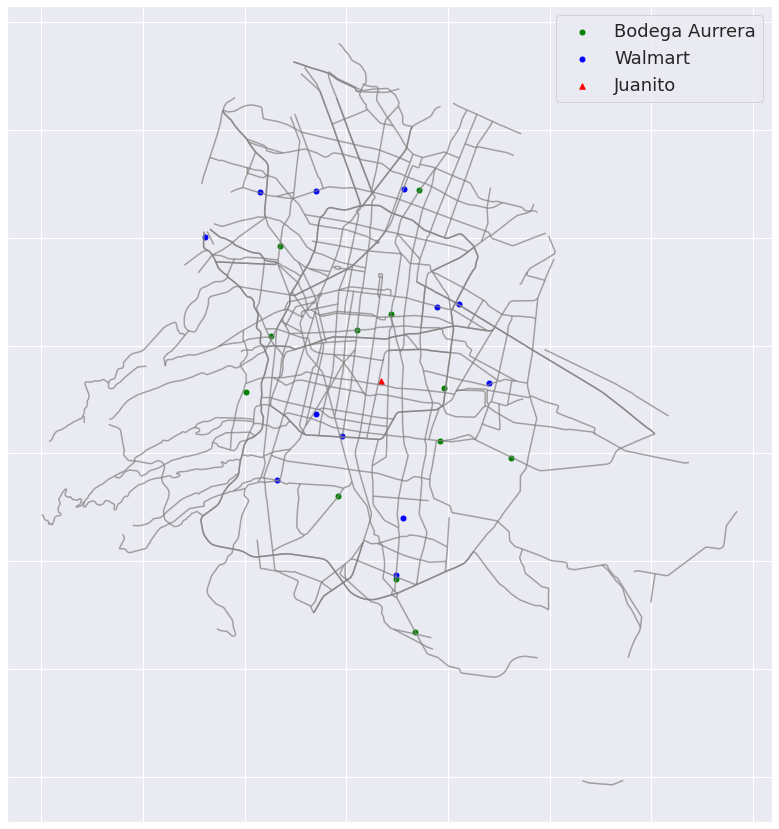

In [554]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xticklabels([]) #quita los numeros en el eje x
ax.set_yticklabels([])
mapaCDMX.plot(ax=ax, alpha=0.7, color='gray') #alpha: intensidad del color
geo_datos0i[geo_datos0i['cadenaComercial']=='BODEGA AURRERA'].plot(ax=ax, markersize=25, color='green', marker='o', label='Bodega Aurrera')
geo_datos0i[geo_datos0i['cadenaComercial']=='WAL-MART'].plot(ax=ax, markersize=25, color='blue', marker='o', label='Walmart')
geo_datos0i[geo_datos0i['cadenaComercial']=='Juanito'].plot(ax=ax, markersize=30, color='red', marker='^', label='Juanito')
plt.legend(prop={'size':18})

Esto nos ayuda a visualizar el problema de forma realista. Observamos cómo se distribuyen las tiendas que elegimos en el mapa de la Ciudad de México y cómo representan lugares reales de los cuales contamos con los precios reales de todos sus productos. Ahora vamos a abstraer un poco esta idea a implementaciones de bajo nivel para ayudar a Juanito a encontrar el mejor camino para comprar su lista del super.

##Algunas funciones para el cálculo de operaciones a realizar:

Primero veamos el número de elementos que tendremos que calcular para resolver nuestro problema y veamos si lo podemos reducir.

In [555]:
def comb(n, r): #nCr
  return math.factorial(n)/(math.factorial(n-r)*math.factorial(r))

La obtención de las siguientes fórmulas/funciones se hizo de forma intuitiva y se explica en la documentación técnica.

In [556]:
def numViajes(numSucursales, numProductos): #numero de ciclos que crearemos desde Juanito hasta Juanito
  sum = numSucursales
  if numProductos >= numSucursales: #si buscamos 10 productos y solo hay 4 tiendas, no podemos ir a máximo 10 tiendas diferentes como habíamos asumido (asumiamos que numProductos<numSucursales), solo podremos ir a un máximo de 4 tiendas
    numProductos = numSucursales
  for i in range(2,numProductos+1):
    sum += comb(numSucursales, i)
  return int(sum)

In [557]:
def numAristas(numSucursales, numProductos): #numero de tiempos de un lugar a otro que calcularemos (suma de todas las aristas de todos los ciclos que crearemos)
  sum = numSucursales
  if numProductos >= numSucursales:
    numProductos = numSucursales 
  for i in range(2,numProductos+1):
    sum += (i+1)*comb(numSucursales, i)
  return int(sum)

In [558]:
numViajes(24,3)

2324

In [559]:
numViajes(5,6)

31

In [560]:
numAristas(24,3)

8948

Dado que numAristas() calcula la suma de todas las aristas de todos los ciclos, es claro notar que repite muchas ya que hay ciclos que contienen a las aristas de otros ciclos. Si pensamos a Juanito y a las tiendas que lo rodean como vértices y construimos un grafo completo, vemos que este contiene a todos los ciclos posibles que comiencen y terminen en Juanito. Sabemos que un grafo completo contiene $n*(n-1)/2$ aristas, por lo que estas son el número mínimo de aristas que debemos calcular si consideramos todos los ciclos posibles.

In [561]:
def numAristasMin(numSucursales): #en este caso numSucursales tambien incluye a Juanito
  return int((numSucursales)*(numSucursales-1)/2) 

In [562]:
numAristasMin(24) #reduce considerablemente

276

##API para obtencion de tiempos de viaje:

In [563]:
import requests
import json #=javascript object notation, sirve para pasar de json a python

Veamos como obtendremos los tiempos de un lugar a otro. Tomemos algunas latitudes y longitudes disponibles:

In [564]:
lat1, long1 = datos0i.iloc[0][6:].values
sucursal1 = datos0i.iloc[0][4]
print(lat1, long1, sucursal1, sep=', ')

19.330481, -99.154328, BODEGA AURRERA SUCURSAL CANTIL


In [565]:
lat2, long2 = datos0i.iloc[1000][6:].values
sucursal2 = datos0i.iloc[1000][4]
print(lat2, long2, sucursal2, sep=', ')

19.407087, -99.144805, BODEGA AURRERA SUCURSAL DOCTORES


Llamada a la API de OpenStreetMap para obtener tiempo de viaje de punto A a punto B:

In [566]:
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{long1},{lat1};{long2},{lat2}?overview=false""")

In [567]:
#"desempacamos":
rutas = json.loads(r.content)

In [568]:
#por curiosidad:
rutas 

{'code': 'Ok',
 'routes': [{'legs': [{'steps': [],
     'summary': '',
     'weight': 782,
     'duration': 782,
     'distance': 9510.7}],
   'weight_name': 'routability',
   'weight': 782,
   'duration': 782,
   'distance': 9510.7}],
 'waypoints': [{'hint': 'db2SiP___38kAAAAJwAAAAAAAAAAAAAAOI5xQd1_nD8AAAAAAAAAACQAAAAnAAAAAAAAAAAAAABFWQAAwAUX-uX0JgFoBhf6sfUmAQAAPxNB6aZy',
   'distance': 28.663245,
   'name': '',
   'location': [-99.154496, 19.330277]},
  {'hint': 'Hc5kif___38EAAAAMQAAAAAAAAAAAAAAxzYIQRLvn0IAAAAAAAAAAAQAAAAxAAAAAAAAAAAAAABFWQAAmCsX-kIhKAGbKxf67yAoAQAAzxBB6aZy',
   'distance': 9.192796,
   'name': 'Avenida Doctor Ignacio Morones Prieto',
   'location': [-99.144808, 19.40717]}]}

In [569]:
ruta = rutas.get("routes")[0] #rutas solo contiene una ruta, tomamos la de la entrada 0

In [570]:
tiempo = ruta["duration"] 
tiempo #duración en segundos del viaje

782

Obtengamos todos los tiempos para nuestro problema:

In [571]:
lat1, long1 = 19.383600, -99.1330328 #google maps marca 50 minutos para esta ruta
lat2, long2 = 19.283600, -99.1330328

In [572]:
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{long1},{lat1};{long2},{lat2}?overview=false""")

In [573]:
tiempo = json.loads(r.content).get("routes")[0]["duration"] 
(tiempo/60)*1.5 #vamos a multiplicar por 1.5 ya que la API es demasiado optimista y no considera el tráfico
#La API de google "Distance Matrix" sería una mejor opción pero cuesta

20.475

En la sección anterior vimos que podemos solamente hacer $n*(n-1)/2$ llamadas a la API, lo cual es igual al número de aristas de una gráfica completa. Aunque podriamos reducir este número aún más si solo consideramos las "aristas" que tarden menos de una hora en recorrerse, es casi seguro que esto no va a servir de mucho dado que la dimensión de espacio es de O(n^2). Aún así, logramos reducir la dimensión en espacio considerablemente. Ahora ya solo depende del número de tiendas. 

Dado que una gráfica completa es conexa, podemos representarla mediante una lista de todas sus aristas de la forma G = {(a,b), (b,c)} donde a,b y c son los vértices. Vamos a crear la gráfica completa para las ubicaciones de las 24 tiendas que estamos considerando. Los vértices serán tuplas de la forma (latitudX, longitudX), por lo que una arista será de la forma ((latitudX, longitudX), (latitudY, longitudY)). Es un nombre muy feo pero nos va a servir mucho. A la vez que construimos nuestra gráfica completa, obtendremos los tiempos de cada arista. Es decir, para la arista((latitudX, longitudX), (latitudY, longitudY)), su peso corresponderá al tiempo que se hace del lugar con coordenadas (latitudX, longitudX) hasta el lugar con coordenadas (latitudY, longitudY). En este sentido, la gráfica G será un diccionario en donde la llave será la artista y el valor será el tiempo.

In [574]:
datos0iCoordsUnicas.head(3)

,nombreComercial,cadenaComercial,latitud,longitud,geometry
0,BODEGA AURRERA SUCURSAL CANTIL,BODEGA AURRERA,19.330481,-99.154328,POINT (-99.15433 19.33048)
1,BODEGA AURRERA SUCURSAL DOCTORES,BODEGA AURRERA,19.407087,-99.144805,POINT (-99.14481 19.40709)
2,BODEGA AURRERA SUCURSAL FERROCARRIL HIDALGO,BODEGA AURRERA,19.472338,-99.114061,POINT (-99.11406 19.47234)


In [575]:
def graficaConexaConTiempos(colLat, colLong): 
  if len(colLat) != len(colLong):
    return print("\n\tHay más coordenadas de un tipo que de otro")
  coords = colLat.astype(str) + ',' + colLong.astype(str)
  G = {}
  for i in range(len(coords)-1):
    for j in range(i+1, len(coords)):
      r = requests.get(f"http://router.project-osrm.org/route/v1/car/{colLong[i]},{colLat[i]};{colLong[j]},{colLat[j]}?overview=false""")
      tiempo = json.loads(r.content).get("routes")[0]["duration"] 
      G[coords[i] + ',' + coords[j]] = (tiempo/60)*1.5
  return G

In [576]:
G = graficaConexaConTiempos(datos0iCoordsUnicas.loc[:,'latitud'], datos0iCoordsUnicas.loc[:,'longitud']) #tarda 3 minutos aprox

In [577]:
len(G)

300

In [578]:
numAristasMin(len(datos0iCoordsUnicas)) #300=300 (datos0iCoordsUnicas incluye a Juanito, numAristasMin() considera el total de vertices)

300

##Algoritmo de búsqueda para el problema:

Una vez que contamos con nuestro diccionario de aristas de la gráfica completa y sus tiempos respectivos, ahora vamos a definir algunos elementos adicionales para crear nuestra solución al problema.

Notemos que si consideramos 24 tiendas y 3 productos por obtener existen numViajes(24,3) ciclos que empiezan y terminan en Juanito:

In [579]:
numViajes(24,3) #no se considera a Juanito en numSucursales de esta función

2324

Esto supone una complejidad de tiempo y espacio muy grande que intentaremos reducir con ayuda del tiempo límite de 60 minutos (iremos sumando el peso de las aristas y añadiremos 10 minutos por cada vértice/tienda al que vayamos). Asímismo, buscaremos aplicar un algoritmo voráz que incorpore backtracking para no irnos por todos los ciclos posibles, sino ir haciendo optimizaciones locales del precio de los productos y regresarnos (backtrack) si nos pasamos del tiempo. No se tenía pensado hacer esto pero dada la complejidad de tiempo y espacio que hubiera resultado de recorrer todos los ciclos posibles y de cada uno hacer todas las combinaciones para ver qué producto comprar de qué tienda es algo muy poco óptimo. No obstante, la solución propuesta es elegante correcta. 

Veamos que la suma total de aristas de cada ciruito es:

In [580]:
numAristas(24,3) 

8948

Esto también se puede ver como el máximo número de llamadas que tendremos que hacer al diccionario G que acabamos de crear. Afortunadamente, el tiempo de consulta a un diccionario en python es O(1).

Definamos los productos que busca Juanito y el tiempo máximo que desea tardarse en "hacer el super". Cabe destacar que no es lo más óptimo para el usuario hacer búsquedas por presentación del producto. Si hiceramos una aplicación sería mejor desplegar las categorías de los productos, luego los productos y por último las presentaciones. 

In [581]:
datos0i.loc[:,'presentacion'].unique()[:20] #Aquí hay de donde elegir

array(['BOTELLA 1 LT. MIXTO', 'BOTELLA 845 ML. CANOLA',
       'BOTELLA 850 ML. MIXTO. SABOR MANTEQUILLA', 'BOTELLA 946 ML. SOYA',
       'MANOJO', 'BOTELLA 650 ML. CERAMIDAS',
       'BOTELLA 650 ML. STOP CAÍDA', 'BOTELLA 700 ML. RESTAURACIÓN',
       'BOTELLA 2 LT.', 'BOTELLA 600 ML. LIMON & NADA',
       'BOTELLA 600 ML. NARANJA & NADA',
       'CANASTILLA C / 6 BOTELLAS DE 296 ML.', 'BOTELLA 420 MILILITROS',
       'BOTELLA 1 LT.', 'BOTELLA 1.5 LT.', 'BOTELLA 1.5 LT. LIMON',
       'GARRAFÓN 10 LT.', '1 KG. HASS',
       'BOTELLA 500 MILILITROS. ETÍLICO DESNATURALIZADO. 70°.',
       'FRASCO 113 GR. A PARTIR DE LOS 6 MESES. MANZANA'], dtype=object)

In [582]:
prods = ['1 KG. GRANEL. CARNE PARA ASAR', 'BOTE 900 GR. FRESA', 'PAQUETE C/12. BLANCO'] #corresponden a carne de res, yoghurt, y huevos.

Filtramos nuestros datos para solo tener estas presentaciones:

In [583]:
datos0iProds = datos0i.loc[(datos0i.loc[:,'presentacion']==prods[0])|(datos0i.loc[:,'presentacion']==prods[1])|(datos0i.loc[:,'presentacion']==prods[2])].loc[:,['presentacion', 'precio', 'latitud', 'longitud']]

In [584]:
datos0iProds.head(3)

,presentacion,precio,latitud,longitud
75,1 KG. GRANEL. CARNE PARA ASAR,197.0,19.330481,-99.154328
224,PAQUETE C/12. BLANCO,28.0,19.330481,-99.154328
636,BOTE 900 GR. FRESA,29.5,19.330481,-99.154328


Veamos para cada presentación cuantas tiendas de las 24 que elegimos cuentan con ellas:

In [585]:
sum = []
for i in prods:
  sum.append(len(datos0iProds.loc[datos0iProds.loc[:,'presentacion']==i, 'latitud'].unique()))
sum

[22, 22, 21]

Dividamos el data set en tres diferentes, uno para cada producto. Primero veamos los precios mínimos de cada uno y nombremoslos acorde a eso:

In [586]:
sum = []
for i in prods:
  sum.append(min(datos0iProds.loc[datos0iProds.loc[:,'presentacion']==i, 'precio']))
sum

[169.0, 29.5, 28.0]

In [587]:
np.argsort(sum)

array([2, 1, 0])

In [588]:
prod1 = datos0iProds.loc[datos0iProds.loc[:,'presentacion']==prods[np.argsort(sum)[2]], ['presentacion', 'precio', 'latitud', 'longitud']] #el más caro
prod2 = datos0iProds.loc[datos0iProds.loc[:,'presentacion']==prods[np.argsort(sum)[1]], ['presentacion', 'precio', 'latitud', 'longitud']]
prod3 = datos0iProds.loc[datos0iProds.loc[:,'presentacion']==prods[np.argsort(sum)[0]], ['presentacion', 'precio', 'latitud', 'longitud']] #el menos caro

La idea es elegir las tiendas que tengan los precios más bajos de cada uno de nuestros productos e ir a dichas tiendas yendo primero a la del producto cuyo precio mínimo es el más alto a comparación del mínimo de los otros productos y seguir en orden descendente en precio hasta llegar a la tienda donde está el producto con el precio más bajo comparado con los otros. De esta forma si regresamos a donde está Juanito y el ciclo resulta ser de más de una hora, nos regresamos y buscamos el segundo precio más barato para el último producto que elegimos.

Si el último producto que elegimos fue el de menor precio de su mismo tipo pero el de mayor precio a comparación con los otros, entonces si tenemos que elegir el segundo de menor precio, asumimos que esta diferencia de precio va a ser mayor que la diferencia de precio de productos de menor precio. Por eso primero visitaremos la tienda con el producto de mayor precio.

Ordenamos los data frames prodi de menos a más de acuerdo a la columna 'precio'. Esto lo interpretaremos como la parte voraz del algoritmo.

In [589]:
prod1 = prod1.sort_values('precio').reset_index(drop=True)
prod2 = prod2.sort_values('precio').reset_index(drop=True)
prod3 = prod3.sort_values('precio').reset_index(drop=True)

In [590]:
coordsJuanito = str(latJuanito) + ',' + str(longJuanito)

In [591]:
prod1.head(3)

,presentacion,precio,latitud,longitud
0,1 KG. GRANEL. CARNE PARA ASAR,169.0,19.407087,-99.144805
1,1 KG. GRANEL. CARNE PARA ASAR,189.0,19.267356,-99.116357
2,1 KG. GRANEL. CARNE PARA ASAR,189.0,19.404703,-99.187290


La siguiente función tomará la ubicacion de la tienda donde está el precio más barato para el producto 1, la ubicación de la tienda donde está el precio más barato para el producto 2, y la ubicación de la tienda donde está el precio más barato para el producto 3. Si se da el caso de que las coordenadas son las mismas, es decir, en una tienda hay dos o más productos que buscamos al mejor precio, entonces no va a calcular ningun tiempo (no suma nada). Si se da el caso de que las tres tiendas son diferentes, entonces calculará a lo más 4 distancias (desde la casa de Juanito hasta la tienda 1, luego a la tienda 2, luego a la 3, y finalmente de vuelta a la casa de Juanito. posible() regresa el tiempo del ciclo. 

In [592]:
def posible(coords1, coords2, coords3, coordsJuanito, G):
  tiempo = 0
  #juanito a coords1:
  try:
    tiempo += G[coordsJuanito + ',' + coords1]
    tiempo += 5 
  except Exception:
    try: 
      tiempo += G[coords1 + ',' + coordsJuanito] 
      tiempo += 5
    except Exception:
      try:
        tiempo += 5 
      except Exception:
        pass

  #coords1 a coords2:
  try:
    tiempo += G[coords1 + ',' + coords2]
    tiempo += 5 #si se fue de un lugar diferente a otro, entonces se asume que tardaremos un mínimo de 5 minutos en la nueva tienda
  except Exception:
    try: 
      tiempo += G[coords2 + ',' + coords1] #dado que la distancia de coord1 a coord2 = coord2 a coord1, si lo de arriba no se da, buscamos coords2 a coords1 en el diccionario
      tiempo += 5
    except Exception:
      try:
        tiempo += 5 #si no se movió de tienda, aún así sumamos los 5 minutos que tarda en la tienda actual
      except Exception:
        pass

  #coords2 a coords3:
  try:
    tiempo += G[coords2 + ',' + coords3]
    tiempo += 5 
  except Exception:
    try: 
      tiempo += G[coords3 + ',' + coords2] 
      tiempo += 5
    except Exception:
      try:
        tiempo += 5 
      except Exception:
        pass

  #coords3 a juanito:
  try:
    tiempo += G[coords3 + ',' + coordsJuanito]
    tiempo += 5 
  except Exception:
    try: 
      tiempo += G[coordsJuanito + ',' + coords3] 
      tiempo += 5
    except Exception:
      try:
        tiempo += 5 
      except Exception:
        pass

  return tiempo

In [593]:
def voraz(prod1, prod2, prod3, coordsJuanito, G, tiempoMax):
  flag = 0
  for i in range(len(prod1)):
    for j in range(len(prod2)):
      for k in range(len(prod3)):
        prod1Coord = str(prod1.loc[i, 'latitud']) + ',' + str(prod1.loc[i, 'longitud'])
        prod2Coord = str(prod2.loc[j, 'latitud']) + ',' + str(prod2.loc[j, 'longitud'])
        prod3Coord = str(prod3.loc[k, 'latitud']) + ',' + str(prod3.loc[k, 'longitud'])
        tiempo = posible(prod1Coord, prod2Coord, prod3Coord, coordsJuanito, G)
        if tiempo<=tiempoMax:
          precio = prod1.loc[i, 'precio'] + prod2.loc[j, 'precio'] + prod3.loc[k, 'precio'] 
          return tiempo, precio, prod1Coord, prod2Coord, prod3Coord

El algoritmo no implementó backtracking como se tenía planeado y no es voraz como tal dentro de la implementación. Tiene una complejidad de O(n^p) donde n es max(numero de tiendas que ofrecen prod1, numero de tiendas que ofrecen prod2, etc) y p es el número de productos que buscamos (en este caso fueron 3). Incluso con esto, el algoritmo corre bastante rápido debido a cómo ordenamos los data frames prod1, 2 y 3. Es voraz en el sentido de que directamente elegimos ir a las tiendas que ofrecen el menor precio para cada uno de los productos que buscamos, calculamos la distancia de este recorrido, y checamos si nos tardamos menos de 1 hora. 

In [594]:
tiempo, precio, prod1Coord, prod2Coord, prod3Coord = voraz(prod1, prod2, prod3, coordsJuanito, G, 60)

In [595]:
tiempo, precio, prod1Coord, prod2Coord, prod3Coord #vemos que se tardaría casi una hora, se gastaria 227 pesos y visitaría 3 tiendas diferentes.

(59.5475,
 227.0,
 '19.407087,-99.144805',
 '19.357925,-99.152347',
 '19.368269,-99.164848')

Aquí se pude hacer todo tipo de cosas con este algoritmo. Dibujar el resultado en el mapa, devolverle al usuario el nombre de las sucursales, etc. El algortimo funciona correctamente y ese era el objetivo. Por el momento le dejamos hasta aquí. 